In [3]:
import json 

In [32]:
def analyze_json_files(file_a, file_b, file_c, output_file):
    # Load the JSON files
    with open(file_a, 'r') as f_a, open(file_b, 'r') as f_b:
        data_a = json.load(f_a)
        data_b = json.load(f_b)
    
    # Load file_c as multiple JSON objects (if applicable)
    data_c = []
    with open(file_c, 'r') as f:
        for line in f:
            data_c.append(json.loads(line))
    # Ensure both JSON files are lists of objects
    if not isinstance(data_a, list) or not isinstance(data_b, list) or not isinstance(data_c, list):
        raise ValueError("All JSON files must contain lists of objects.")
    
    # Create a lookup for file_c using 'Unnamed: 0' as the index
    index_lookup = {item['Unnamed: 0']: item['source'] for item in data_c}
    
    # Count the number of instances where match is True in a and False in b
    count = 0
    matching_data = []
    
    for item_a, item_b in zip(data_a, data_b):
        if 'match' in item_a and 'match' in item_b:
            if item_a['match'] == True and item_b['match'] == False:
                # Check if the corresponding source exists in file_c based on 'index' instead of 'Unnamed: 0'
                index = item_a.get('index')
                if index in index_lookup:
                    item_a['source'] = index_lookup[index]  # Add the source field from file_c
                    print(f"Source found: {item_a['source']}")
                    
                # Add 'output' from item_b as 'vulrepair' to item_a
                if 'output' in item_b:
                    item_a['vulrepair'] = item_b['output']
                    print(f"Vulrepair added: {item_a['vulrepair']}")
                    
                matching_data.append(item_a)
                count += 1

    # Output the result
    print(f"Number of entries where 'match' is True in file_a and False in file_b: {count}")
    
    # Save result to JSON file
    with open(output_file, 'w') as f_out:
        json.dump(matching_data, f_out, indent=4)
    print(f"Result saved to {output_file}")

In [33]:
flow_gnn_json = '/home/hdd/qingao/DeepDFA/CodeT5/saved_models/repair/codeT5/eval_results.json'
vulrepair_json = '/home/hdd/qingao/DeepDFA/CodeT5/saved_models/repair/codeT5/onlyt5/eval_results.json'
test_data = '/home/l1/qingao/DeepDFA/DDFA/storage/external/test_data.json'
output_file = "result_with_source.json"  # Replace with the desired output file path

analyze_json_files(flow_gnn_json, vulrepair_json, test_data, output_file)

Source found:  void GLES2Implementation::BeginQueryEXT(GLenum target, GLuint id) { GPU_CLIENT_SINGLE_THREAD_CHECK(); GPU_CLIENT_LOG("[" << GetLogPrefix() << "] BeginQueryEXT(" << GLES2Util::GetStringQueryTarget(target) << ", " << id << ")"); switch (target) { case GL_COMMANDS_ISSUED_CHROMIUM: case GL_LATENCY_QUERY_CHROMIUM: case GL_ASYNC_PIXEL_PACK_COMPLETED_CHROMIUM: case GL_GET_ERROR_QUERY_CHROMIUM: <Vul_Start><Vul_End> break; case GL_READBACK_SHADOW_COPIES_UPDATED_CHROMIUM: case GL_COMMANDS_COMPLETED_CHROMIUM: if (!capabilities_.sync_query) { SetGLError(GL_INVALID_OPERATION, "glBeginQueryEXT", "not enabled for commands completed queries"); return; } break; case GL_SAMPLES_PASSED_ARB: if (!capabilities_.occlusion_query) { SetGLError(GL_INVALID_OPERATION, "glBeginQueryEXT", "not enabled for occlusion queries"); return; } break; case GL_ANY_SAMPLES_PASSED: case GL_ANY_SAMPLES_PASSED_CONSERVATIVE: if (!capabilities_.occlusion_query_boolean) { SetGLError(GL_INVALID_OPERATION, "glBeginQue

In [23]:
test_data = []
with open('/home/l1/qingao/DeepDFA/DDFA/storage/external/test_data.json', 'r') as f:
    for line in f:
        test_data.append(json.loads(line))

index_lookup = {item['Unnamed: 0']: item['source'] for item in test_data}
print(len(index_lookup))

2180


In [21]:
for item in test_data:
    if 'source' in item:
        print(item['source'])  # 输出 source 列
    else:
        print("No source found in item:", item)


 print_decnet_ctlmsg(netdissect_options *ndo, register const union routehdr *rhp, u_int length, u_int caplen) { <Vul_Start><Vul_End> int mflags = EXTRACT_LE_8BITS(rhp->rh_short.sh_flags); register const union controlmsg *cmp = (const union controlmsg *)rhp; int src, dst, info, blksize, eco, ueco, hello, other, vers; etheraddr srcea, rtea; int priority; const char *rhpx = (const char *)rhp; int ret; switch (mflags & RMF_CTLMASK) { case RMF_INIT: ND_PRINT((ndo, "init ")); if (length < sizeof(struct initmsg)) goto trunc; ND_TCHECK(cmp->cm_init); src = EXTRACT_LE_16BITS(cmp->cm_init.in_src); info = EXTRACT_LE_8BITS(cmp->cm_init.in_info); blksize = EXTRACT_LE_16BITS(cmp->cm_init.in_blksize); vers = EXTRACT_LE_8BITS(cmp->cm_init.in_vers); eco = EXTRACT_LE_8BITS(cmp->cm_init.in_eco); ueco = EXTRACT_LE_8BITS(cmp->cm_init.in_ueco); hello = EXTRACT_LE_16BITS(cmp->cm_init.in_hello); print_t_info(ndo, info); ND_PRINT((ndo, "src %sblksize %d vers %d eco %d ueco %d hello %d", dnaddr_string(ndo, src)

In [5]:
with open('result.json', 'w') as f_out:
    json.dump(suc_data, f_out, indent=4)

In [ ]:
import json

def filter_data_by_n2size(json_file_path):
    # 打开并读取 JSON 文件
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    
    # 检查数据中是否包含 "n2size"，并返回符合条件的数据项
    filtered_data = [item for item in data if 'target' in item and 'n2size' in item['target']]
    
    return filtered_data

In [37]:
train_data = []
with open('/home/l1/qingao/DeepDFA/DDFA/storage/external/train_data.json', 'r') as f:
    for line in f:
        train_data.append(json.loads(line))

filtered_data = [item for item in train_data if 'target' in item and 'size' in item['target']]

print(len(filtered_data))

1086


In [55]:
filtered_data = [item for item in train_data if 'target' in item and 'size' in item['target']]
len(filtered_data)

1

In [56]:
filtered_data[4]

IndexError: list index out of range

In [89]:
import re

# 打开log文件
with open('log.txt', 'r') as file:
    log_data = file.readlines()

# 正则表达式匹配模式
pattern = re.compile(r'(\d+)\s([\d.]+)\s(\d+):\s+em:\s+([\d.]+)')

# 存储匹配结果的列表
results = []

# 逐行读取日志并进行匹配
for line in log_data:
    match = pattern.search(line)
    if match:
        K = int(match.group(1))
        lmbda = float(match.group(2))
        t = int(match.group(3))
        em = float(match.group(4))
        results.append({'K': K, 'lmbda': lmbda, 't': t, 'em': em})

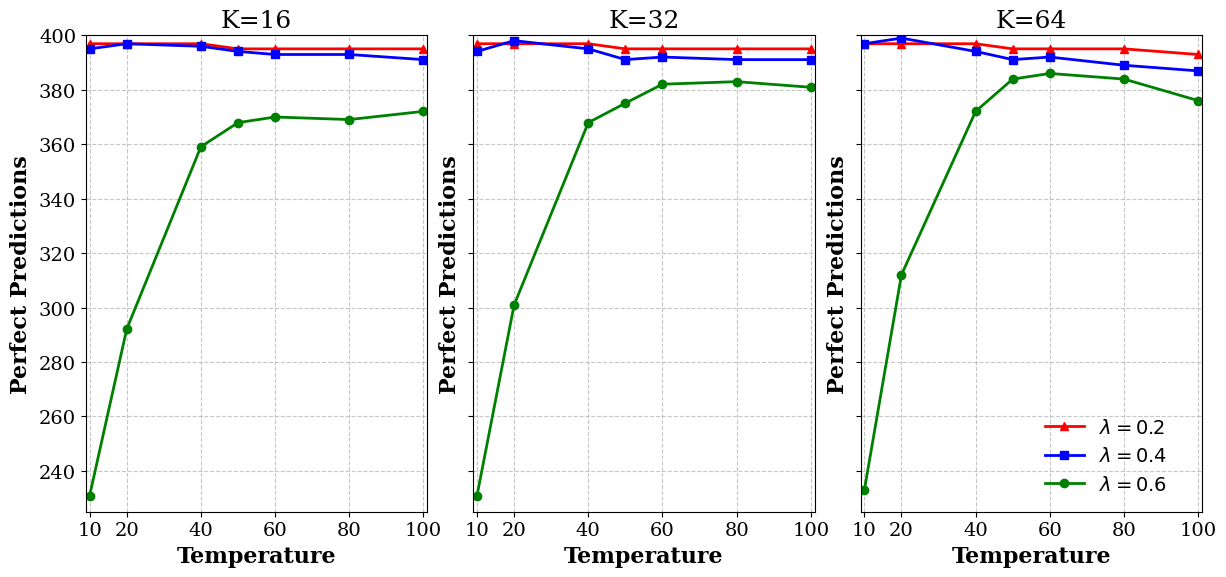

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# 调整字体美观
plt.rcParams['font.family'] = 'serif'  # 设置字体为 serif 或者其他喜欢的字体
plt.rcParams['font.size'] = 14  # 设置全局字体大小
plt.rcParams['axes.titlesize'] = 18  # 设置标题字体大小
plt.rcParams['axes.labelsize'] = 16  # 设置坐标轴标签字体大小
plt.rcParams['legend.fontsize'] = 14  # 设置图例字体大小
plt.rcParams['axes.labelweight'] = 'bold' 
# 定义 lmbda 数值和对应希腊字母 lambda 的映射关系

lmbda_mapping = {
    0.2: r'$\lambda=0.2$',
    0.4: r'$\lambda=0.4$',
    0.6: r'$\lambda=0.6$'
}

grouped_by_K = {}  # 假设这里已经有 grouped_by_K 的内容
for entry in results:  # results 是正则表达式提取的内容
    K = entry['K']
    if K not in grouped_by_K:
        grouped_by_K[K] = []
    grouped_by_K[K].append(entry)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 共享 Y 轴

# 迭代三个不同的 K 值，分别绘制子图
for ax, K in zip(axes, grouped_by_K.keys()):
    entries = grouped_by_K[K]
    ax.set_title(f'K={K}', fontsize=18)
    ax.set_xlabel('Temperature', fontsize=16)
    ax.set_ylabel('Perfect Predictions', fontsize=16, labelpad=5)  # 增大纵轴标签字体并调整与 Y 轴的距离

    # 按 lmbda 分组并画折线图
    lambdas = sorted(set(entry['lmbda'] for entry in entries))
    colors = ['red', 'blue', 'green']
    markers = ['^', 's', 'o']
    
    for idx, lmbda in enumerate(lambdas):
        filtered = sorted([entry for entry in entries if entry['lmbda'] == lmbda], key=lambda x: x['t'])
        t_values = [entry['t'] for entry in filtered]
        em_values = [entry['em'] * 1882 for entry in filtered]  # 纵轴乘以1882

        label = f'$\lambda={lmbda}$'  # 使用希腊字母 λ 替换
        ax.plot(t_values, em_values, marker=markers[idx], linestyle='-', color=colors[idx], label=f'{label}', linewidth=2)

    ax.set_ylim(225, 400)
    ax.set_xlim(9, 101)
    ax.set_xticks([10, 20, 40, 60, 80, 100])
    ax.grid(True, linestyle='--', alpha=0.7)

# 获取第三张子图的引用
third_ax = axes[2]

# 添加图例到第三个子图的右下角空白处
handles, labels = third_ax.get_legend_handles_labels()
third_ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.95, 0), fontsize=14, frameon=False)

plt.tight_layout()
plt.subplots_adjust(left=0.08, right=0.70)  # 手动调整图形布局

# 保存为 PDF 文件，移除不必要的边缘空白
plt.savefig('combined_figure_with_legend.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [67]:
!pip install brokenaxes

DEPRECATION: pytorch-lightning 1.7.0 has a non-standard dependency specifier torch>=1.9.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
